## **1. Collecting and Modifying Data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import data
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **1.1 Transforming The Data**

In [2]:
# The data includes several data types
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [3]:
# We can take a closer look to one of the object data types
print(train['SaleCondition'].unique())

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [4]:
# Using LabelEncoder we can change this object, which is essentially a string, into float or int

# String label to categorical values
from sklearn.preprocessing import LabelEncoder

# Changing all 'object' types into categorical values
for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train[train.columns[i]] = lbl.transform(list(train.iloc[:,i].values))
        test[train.columns[i]] = lbl.transform(list(test.iloc[:,i].values))

print(train['SaleCondition'].unique())

[4 0 5 1 2 3]


### **1.2 Cleaning The Data**

<AxesSubplot: >

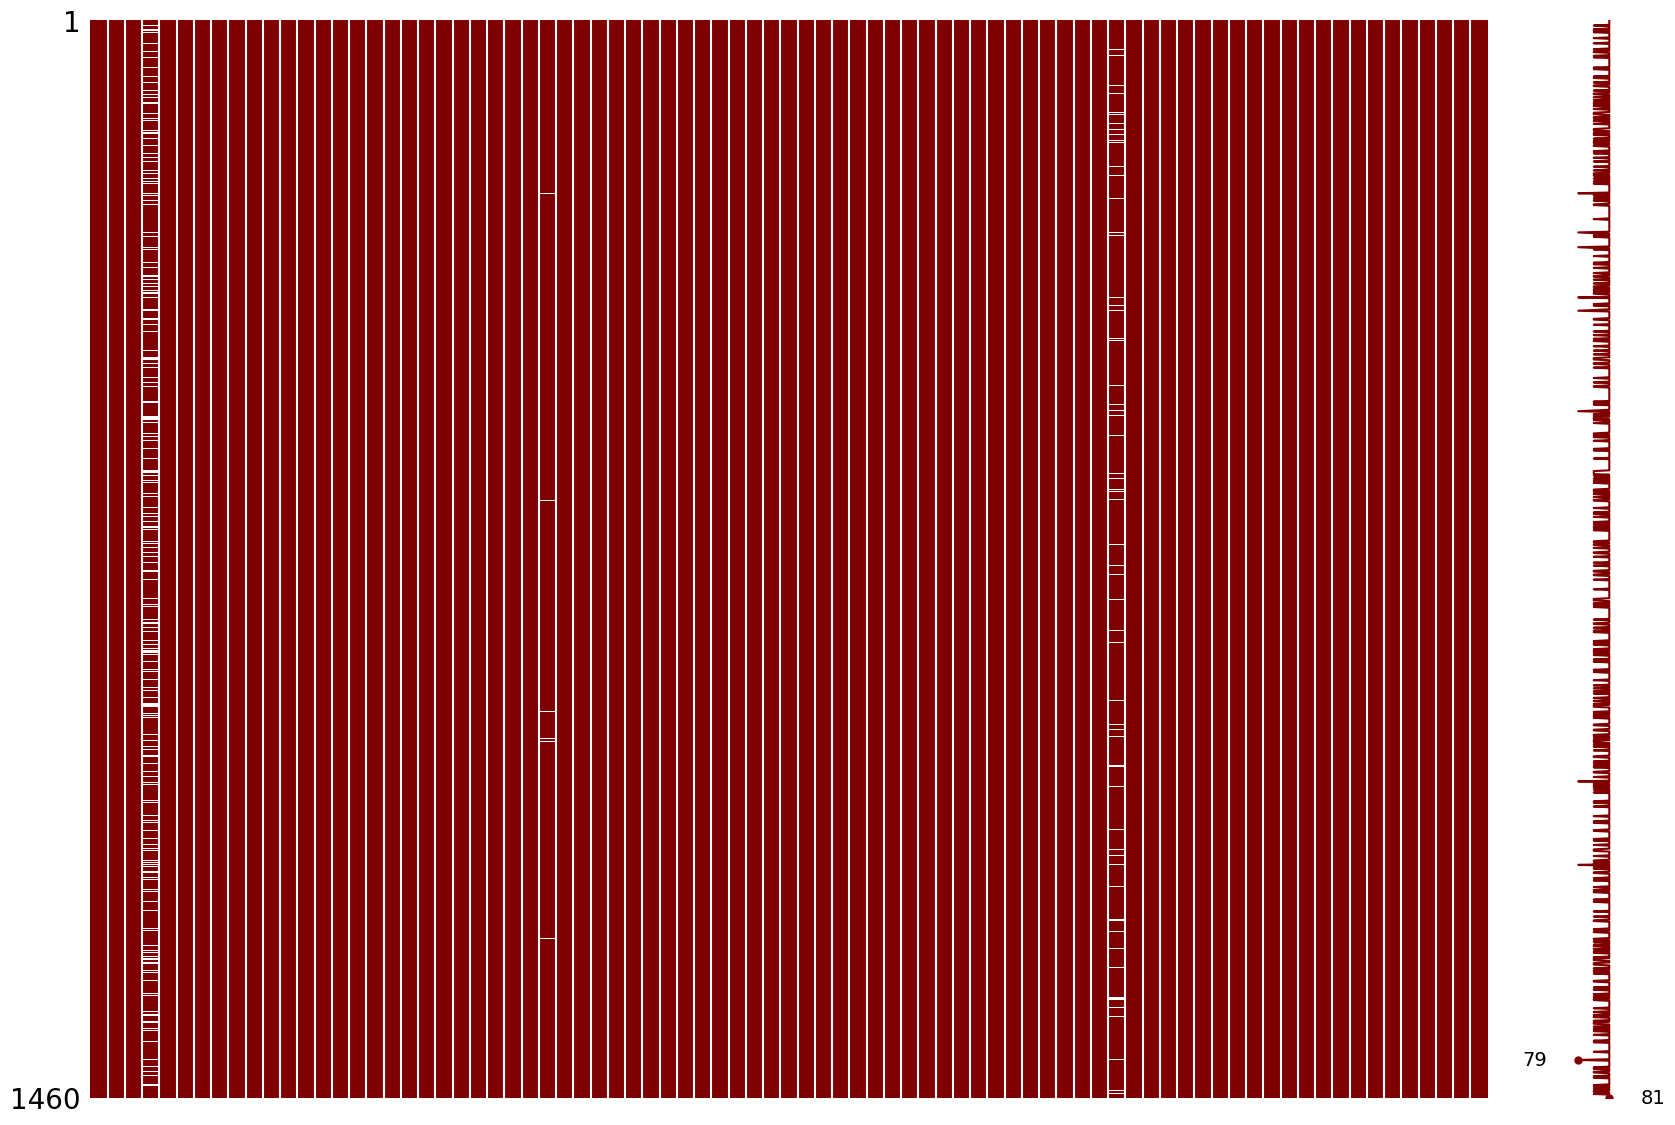

In [5]:
# Now, we can check where we have NaN values in the data
import missingno as msno
msno.matrix(df=train, figsize=(20,14), color=(0.5,0,0))


In [6]:
# The white spaces above represent NaN values in the data
# Observing this matrix we can see that the data contains some NaN values in some of the columns

# Lets check the number NaN values for each column of the data
print(f'{"Training Data":.^25}')
for i in np.arange(train.shape[1]):
    n = train.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(train.columns.values)[i] + ': ' + str(n) + ' NaNs')

print(f'\n{"Testing Data":.^25}')
for i in np.arange(test.shape[1]):
    n = test.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(test.columns.values)[i] + ': ' + str(n) + ' NaNs')

......Training Data......
LotFrontage: 259 NaNs
MasVnrArea: 8 NaNs
GarageYrBlt: 81 NaNs

......Testing Data.......
LotFrontage: 227 NaNs
MasVnrArea: 15 NaNs
BsmtFinSF1: 1 NaNs
BsmtFinSF2: 1 NaNs
BsmtUnfSF: 1 NaNs
TotalBsmtSF: 1 NaNs
BsmtFullBath: 2 NaNs
BsmtHalfBath: 2 NaNs
GarageYrBlt: 78 NaNs
GarageCars: 1 NaNs
GarageArea: 1 NaNs


<AxesSubplot: >

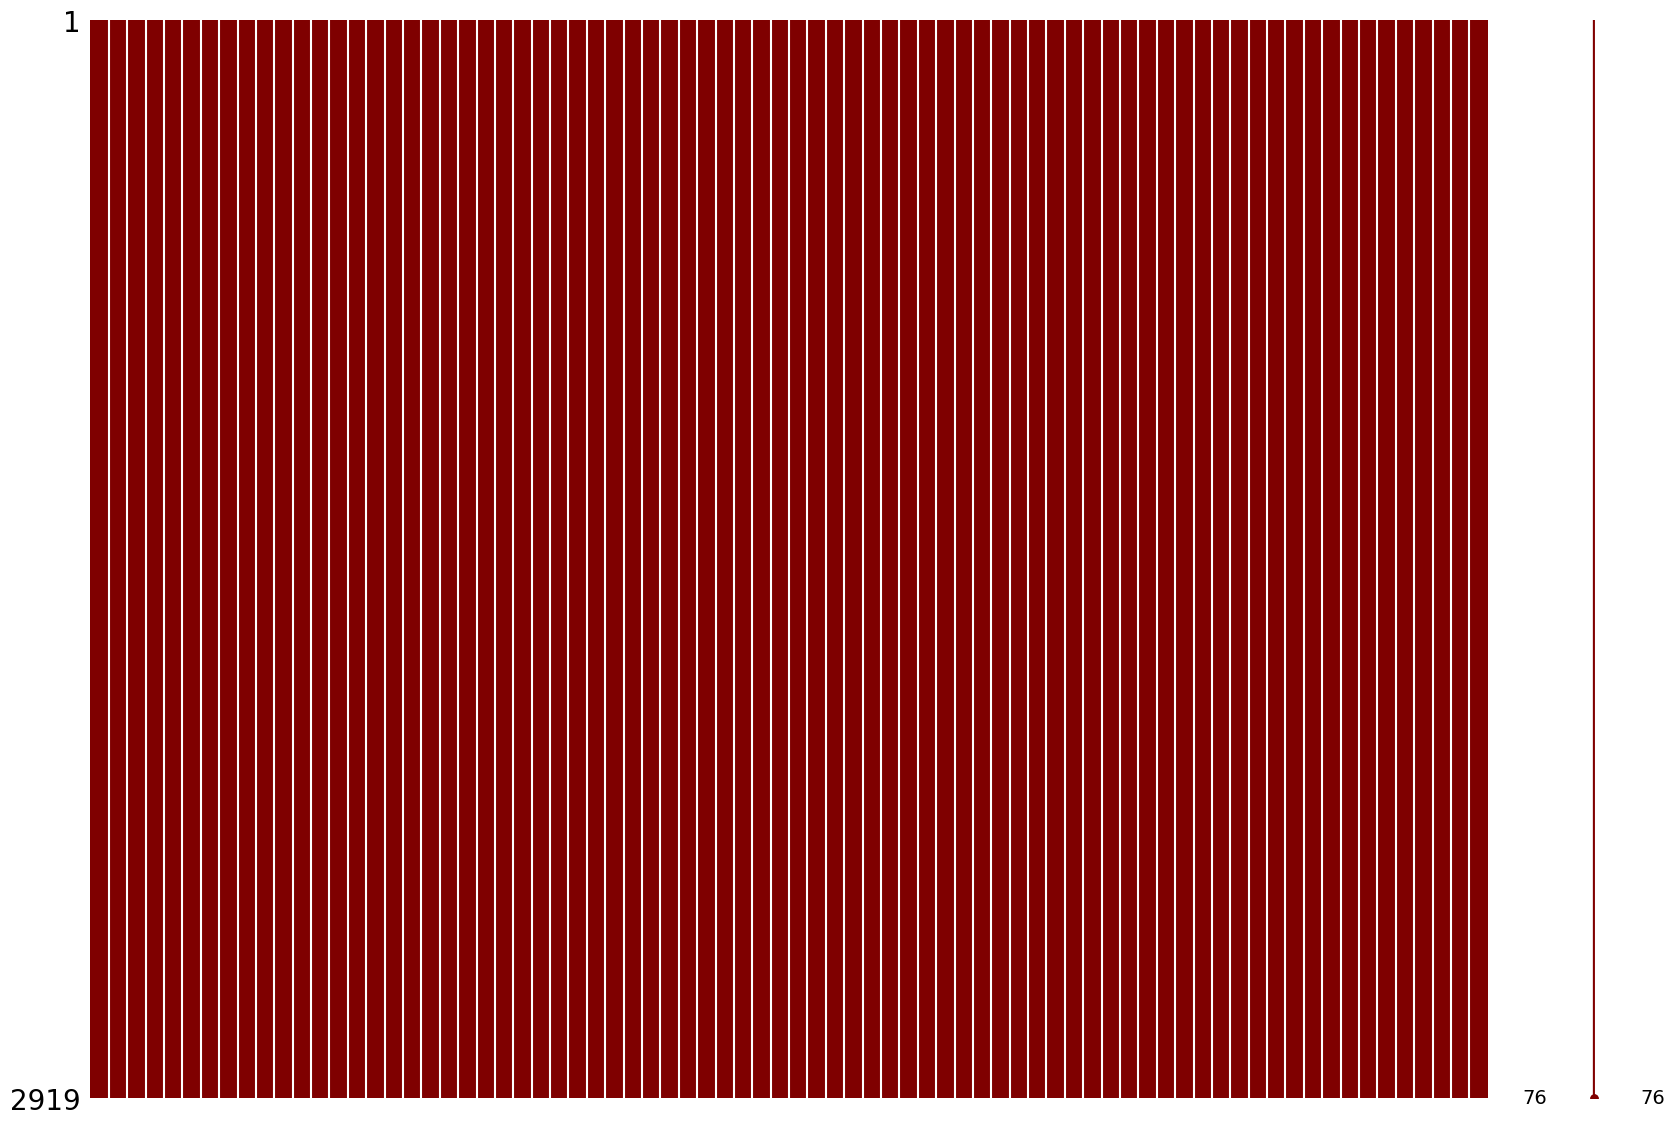

In [7]:
# We can see that 'LotFrontage', 'MasVnrArea' and 'GarageYrBlt' have many NaNs in the both sets, so we just drop them.
# For others, there are few NaNs in each column, so we just replace these values with the median of the corresponding column.

# Keep IDs, later on for predictions
train_ID = train['Id']
test_ID = test['Id']

# Split data for training
y_train = train['SalePrice']
X_train = train.drop(['Id','SalePrice'], axis=1)
X_test = test.drop('Id', axis=1)

# Dealing with missing data
Xmat = pd.concat([X_train, X_test])
Xmat = Xmat.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
Xmat = Xmat.fillna(Xmat.median())

# Check whether there are still NaN values
msno.matrix(df=Xmat, figsize=(20,14), color=(0.5,0,0))

In [8]:
# Now that the NaN values have been either removed or replaced, we can take a look at our features once more
print(Xmat.columns.values)
print(str(Xmat.shape[1]) + ' columns')

['MSSubClass' 'MSZoning' 'LotArea' 'Street' 'Alley' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition']
76 columns


## **2 Feature Engineering and EDA (Exploratory Data Analysis)**

In [9]:
# There are many "...SF" (square feet) values, we can make a new feature that is the sum of all the other SF values

# Add a new feature 'total sqfootage'
Xmat['TotalSF'] = Xmat['TotalBsmtSF'] + Xmat['1stFlrSF'] + Xmat['2ndFlrSF']
print('There are currently ' + str(Xmat.shape[1]) + ' columns.')

There are currently 77 columns.


C:\Users\Rev\AppData\Local\Temp\ipykernel_11228\2337231202.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train)


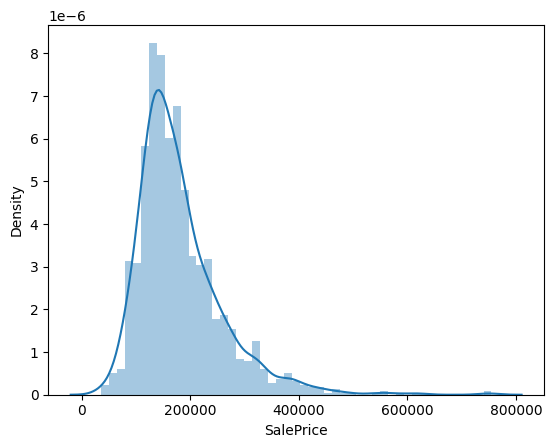

In [10]:
# We can take a look at the target distribution. Optimally, we would like to perform regression
# so we need the target to have a normal distribution

# Normality check for the target
ax = sns.distplot(y_train)
plt.show()

C:\Users\Rev\AppData\Local\Temp\ipykernel_11228\3009971523.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train)


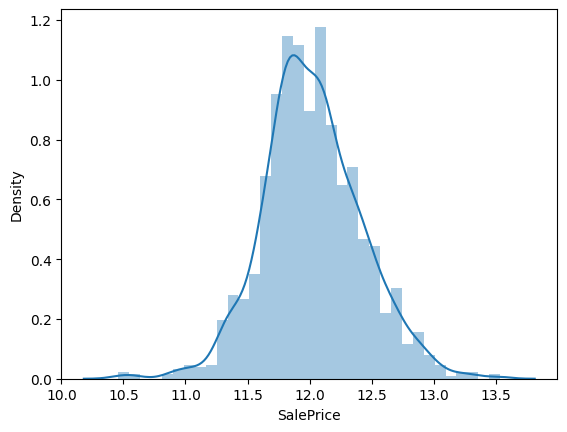

In [11]:
# The target data is right-skewed. To make the data normally distributed, we can take log-transform

# Log-transform the dependent variable for normality
y_train = np.log(y_train)

ax = sns.distplot(y_train)
plt.show()

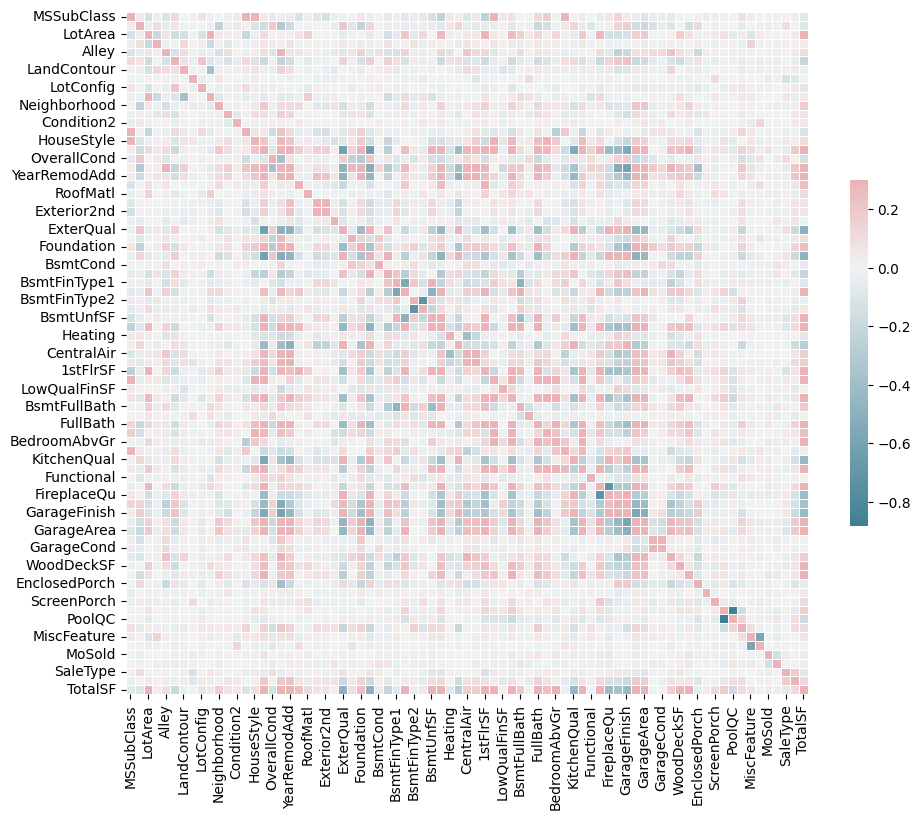

In [12]:
# This is (approximately) normal distribution! As a custom, let's have a look at correlation matrix.

X_train = Xmat.iloc[:train.shape[0],:]
X_test = Xmat.iloc[train.shape[0]:,:]

# Compute the correlation matrix
corr = X_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Training done using Random Forest


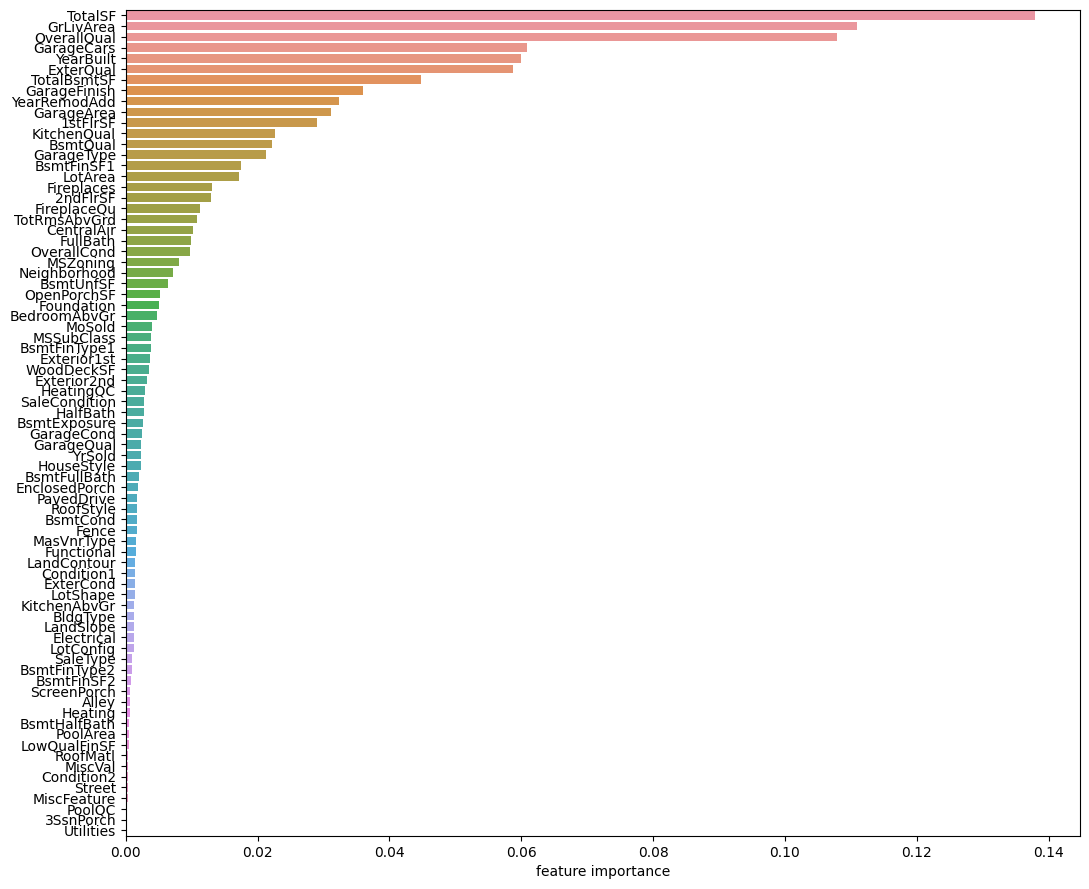

In [13]:
# We can now go for feature selection. To learn more about the importance of each feature
# we can use a random forest regressor.

# Feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features=12)
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

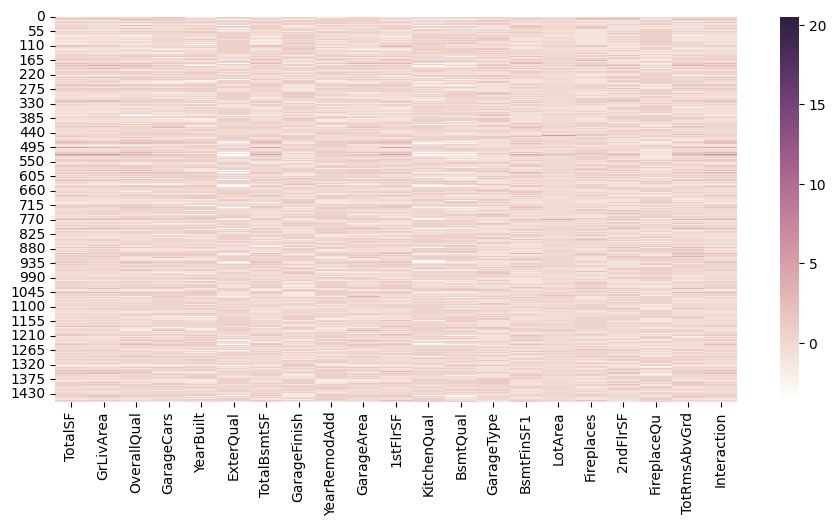

In [14]:
# We can see that most of the features have very little impact. The top 2 most important features are
# OverallQual and the feature that we have added which is TotalSF. So we can use, say, top 20 of the 
# most important features instead of all 77. This helps reduce dimensions.

# Use the top 20 features only
X_train = X_train.iloc[:,ranking[:20]]
X_test = X_test.iloc[:,ranking[:20]]

# Interaction between the top 2
X_train["Interaction"] = X_train["TotalSF"]*X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"]*X_test["OverallQual"]

# Z-scoring
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
    
# Heatmap
f, ax = plt.subplots(figsize=(11, 5))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(X_train, cmap=cmap)
plt.show()

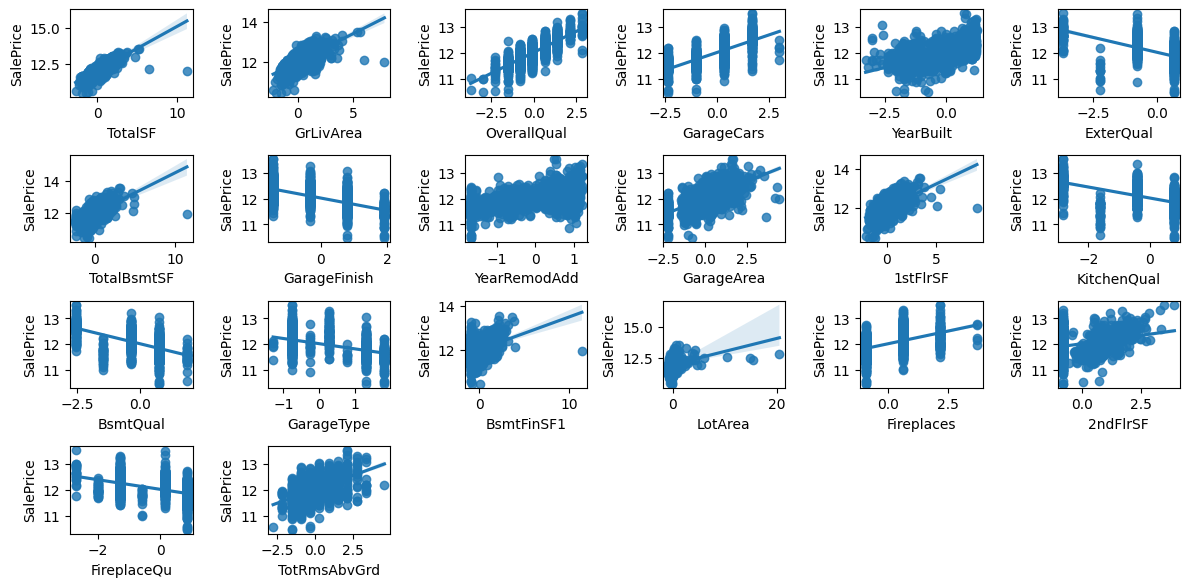

In [15]:
# Now we can take a look at how the features that we have selected relate to the target 'SalePrice'

# Relation to the target
fig = plt.figure(figsize=(12,7))
for i in np.arange(20):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [16]:
# Basically we can see clear linear relationships in many panels. We do not see a lot of outliers, which is good.
# Maybe let's just remove some outlier data points found in the 'totalSF' and 'GrLivArea', which are apparently 
# out of the linear regression line.

# Outlier deletion
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>5) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>5) & (Xmat['SalePrice']<13)].index)

# recover
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

## **3. Modelling Phase**

In [17]:
# Next, we may try something called 'ensembling'. This is the idea that claims that getting better prediction
# performs can be done by averaging prediction accuracy by multiple models instead of relying on a single model.
# In this section we will use three models: XGBoost, Neural Network, and SVR.

from sklearn.model_selection import GridSearchCV

# Starting with XGBoost
import xgboost as xgb

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, y_train)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

Parameter optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.876478987125553
{'max_depth': 2, 'n_estimators': 100}


In [18]:
# Moving on to neural network: we simply use Keras for easy implementation of multi-layer perceptron.

# We can again take advantage of grid search, but that requires Keras' wrapper 'KerasRegressor' (or 'KerasClassifier') to utilize scikit_learn's gird search.
# Here we try to select the best ones with respect to 'optimizer', 'batch_size', and 'epochs'.

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(model=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_train, y_train)

print(reg_dl.best_score_)
print(reg_dl.best_params_)

0.8136446024384597
{'batch_size': 10, 'epochs': 100, 'optimizer': 'Adam'}


In [19]:
# Lastly, we implement SVR (support vector regressior).
# Here, again, we use grid search to optimize some of the SVR's hyperparameters.

from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

0.8881614580019752
{'C': 1.0, 'gamma': 0.01}


## **4. Evaluation**

In [20]:
# So far we have three models. Emsemble methods are simply averaging predicted results across models to improve overall accuracy.
# This method is based on the idea that prediction by each model may be independent of one another and thus averaging predictions
# across models may compensate one another and yield better solution.

# Stacking methods are part of emsemble methods, but they use weighted averaging of predictions by models. The idea is, of course,
# you want to assign more weights on better models and less weights on worse ones, based on the dataset. To determine the weights,
# we treat predictions by models as new features (predictors) and train a linear model to predict our targets.

# So let's first make a new matrix where each column represents prediction by each model.

# Second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
     'NN': reg_dl.predict(X_train).ravel(),
     'SVR': reg_svr.predict(X_train),
    })
X_train2.head()

,XGB,NN,SVR
0,12.273546,12.142735,12.232984
1,12.031464,11.924035,12.017945
2,12.289535,12.249455,12.303996
3,11.936879,11.963025,12.085014
4,12.579061,12.489801,12.573200


In [21]:
# We train a linear regressor for this new training matrix and predict our target! We use Lasso GLM to avoid overfitting.
# We predict our target 'SalePrice', but before we do that we need to convert it back to ordinal scale. It has been in
# log-scale for normality.

# Second-feature modeling using linear regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

# prediction using the test set
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'DL': reg_dl.predict(X_test).ravel(),
     'SVR': reg_svr.predict(X_test),
    })

# Don't forget to convert the prediction back to non-log scale
y_pred = np.exp(reg.predict(X_test2))

d:\Python3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DL
Feature names seen at fit time, yet now missing:
- NN

  warnings.warn(message, FutureWarning)


In [22]:
# submission
submission = pd.DataFrame({
    "Id" : test_ID,
    "SalePrice": y_pred
})
submission.to_csv('./output/houseprice.csv', index=False)